In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Wine.csv')

In [3]:
df.head()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45     1480  
4   2.93      735

In [4]:
df.shape

(178, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [6]:
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [7]:
df.describe()

Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
count  178.000000  178.000000  178.000000    178.000000  178.000000   
mean    13.000618    2.336348    2.366517     19.494944   99.741573   
std      0.811827    1.117146    0.274344      3.339564   14.282484   
min     11.030000    0.740000    1.360000     10.600000   70.000000   
25%     12.362500    1.602500    2.210000     17.200000   88.000000   
50%     13.050000    1.865000    2.360000     19.500000   98.000000   
75%     13.677500    3.082500    2.557500     21.500000  107.000000   
max     14.830000    5.800000    3.230000     30.000000  162.000000   

       Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       Color_Intensity         Hue       OD280      Proline  
count       178.000000  178.000000  178.000000   178.000000  
mean          5.058090    0.957449    2.611685   746.893258  
std           2.318286    0.228572    0.709990   314.907474  
min           1.280000    0.480000    1.270000   278.000000  
25%           3.220000    0.782500    1.937500   500.500000  
50%           4.690000    0.965000    2.780000   673.500000  
75%           6.200000    1.120000    3.170000   985.000000  
max          13.000000    1.710000    4.000000  1680.000000

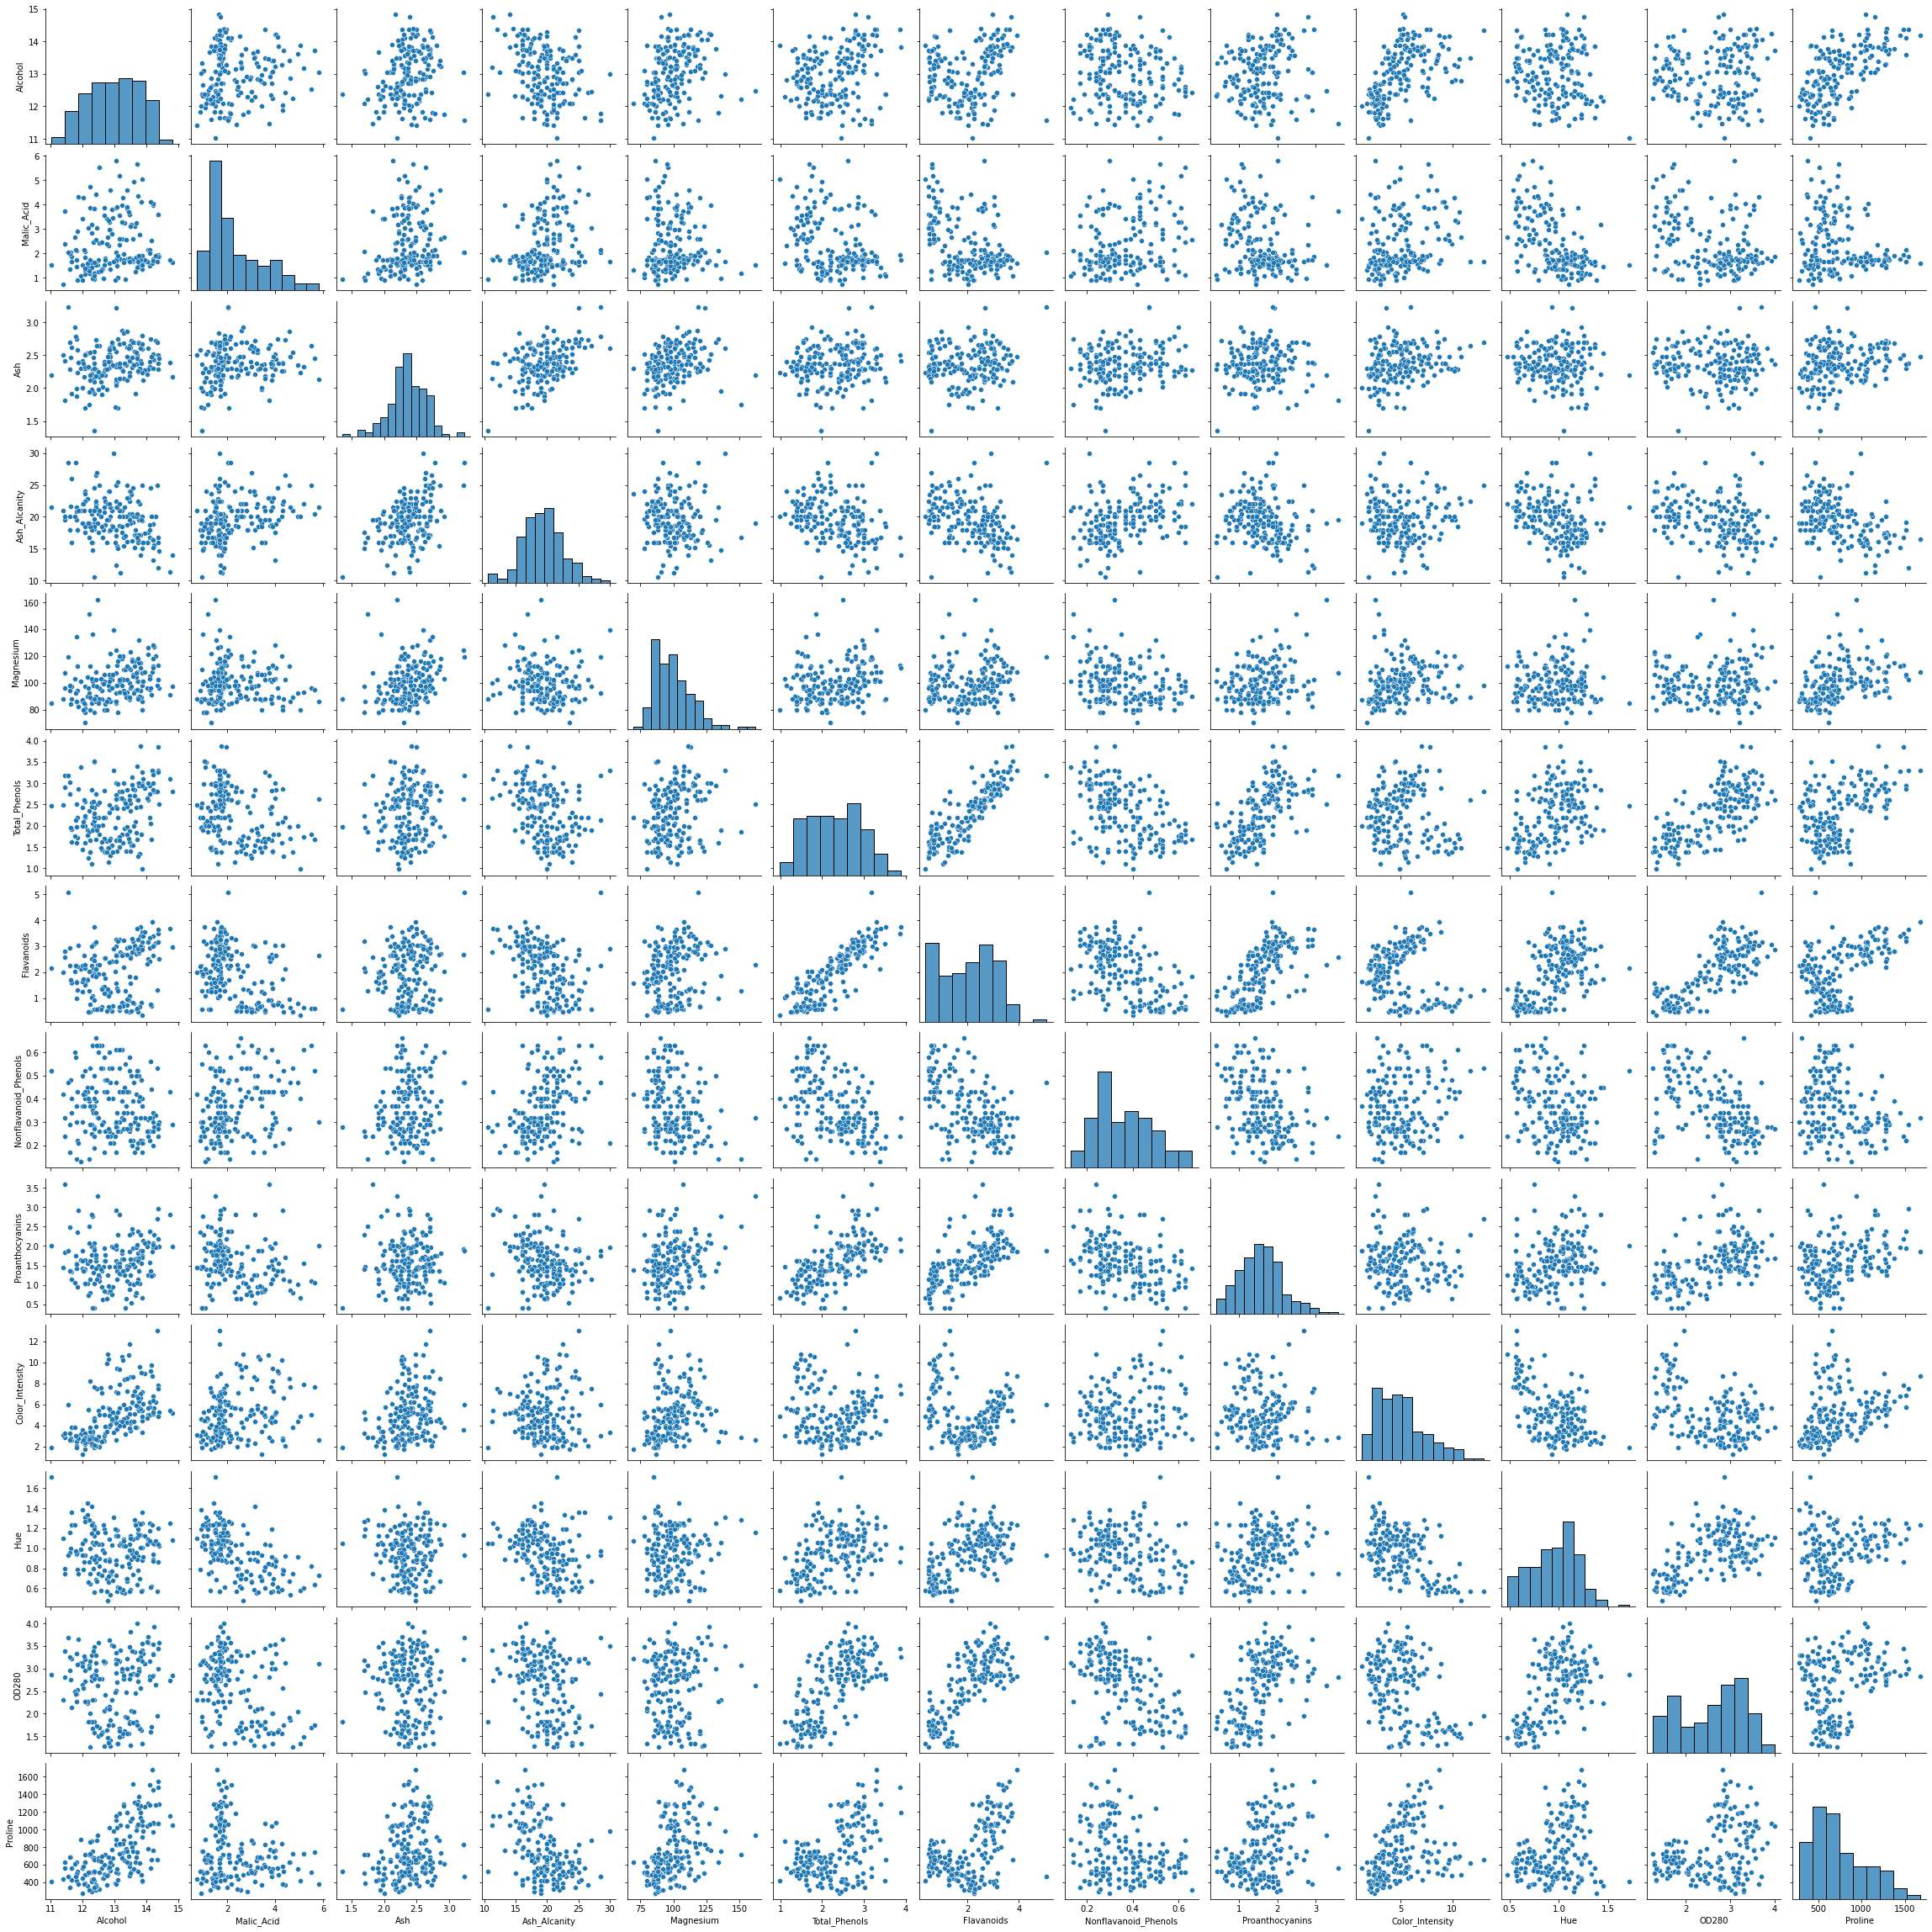

In [8]:
sns.pairplot(df)

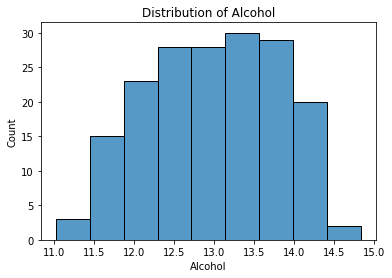

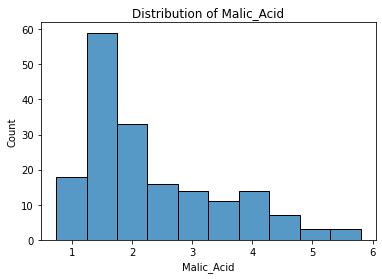

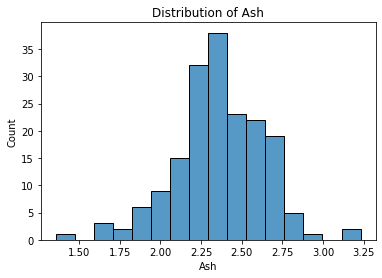

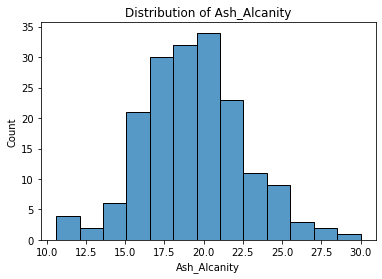

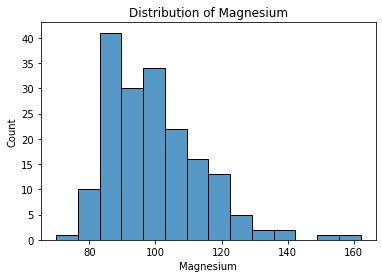

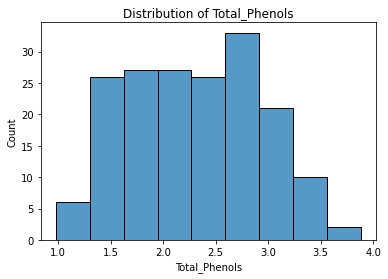

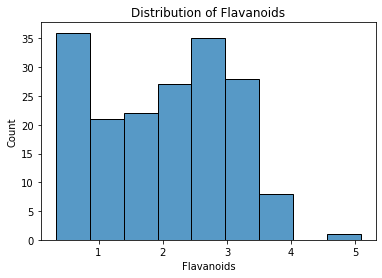

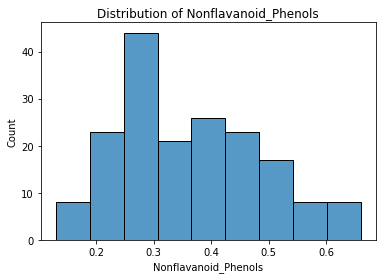

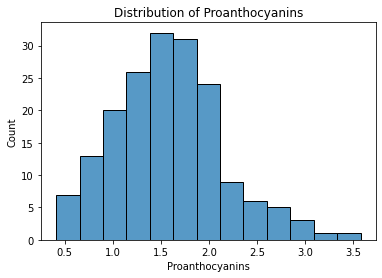

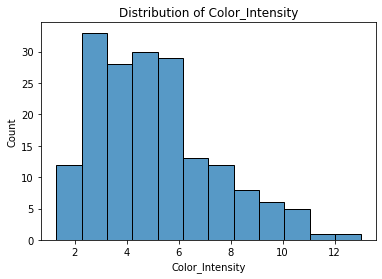

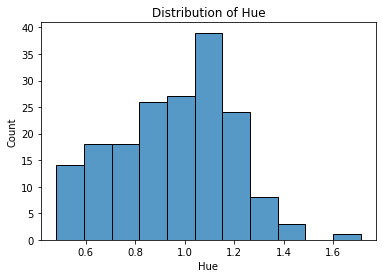

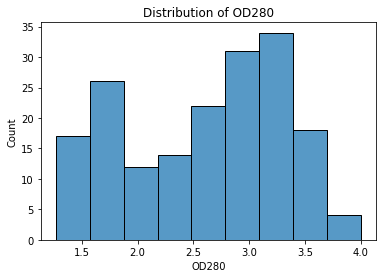

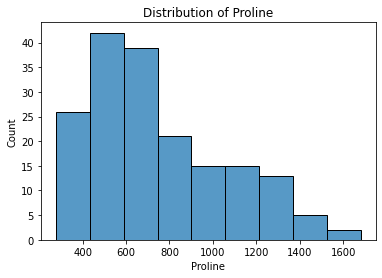

In [9]:
num = df.select_dtypes('number')
for i in num:
    sns.histplot(df[i])
    plt.title(f'Distribution of {i}')
    plt.show()

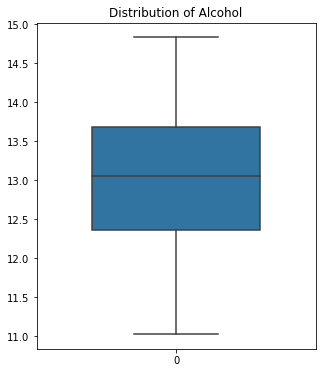

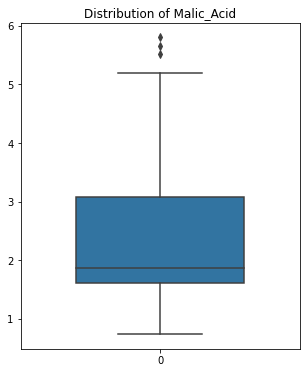

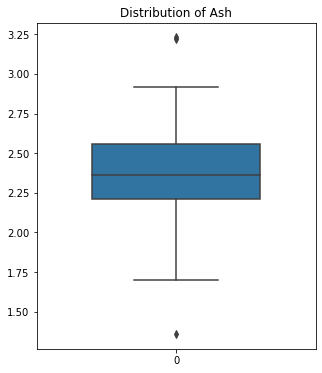

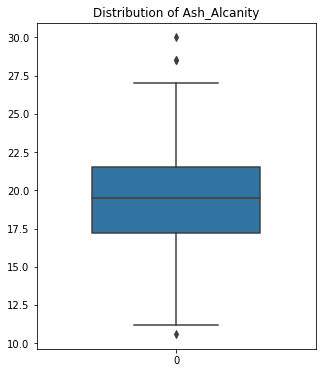

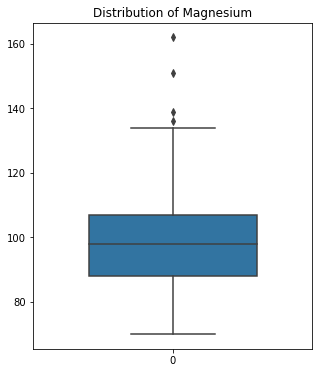

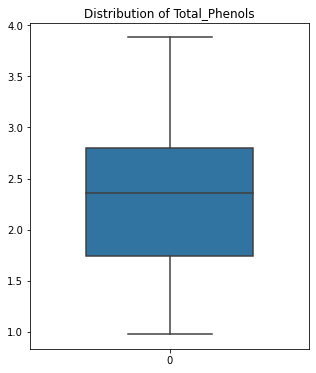

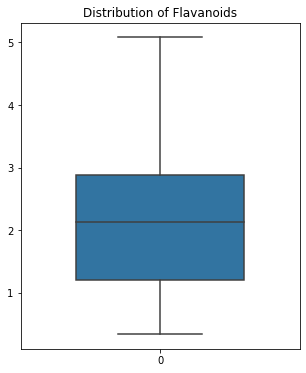

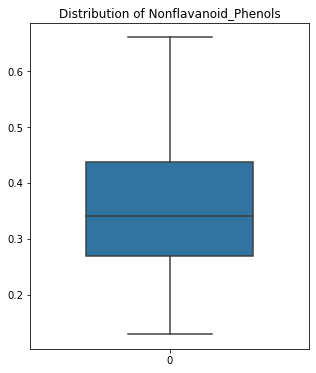

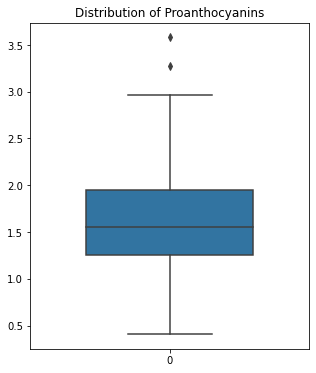

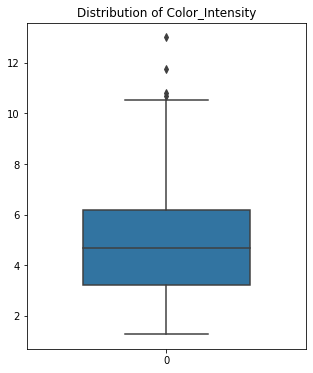

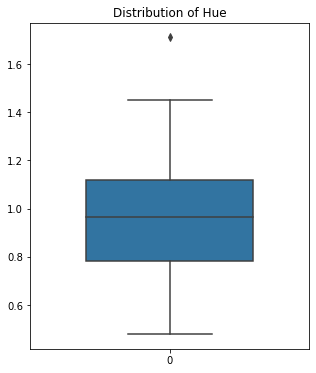

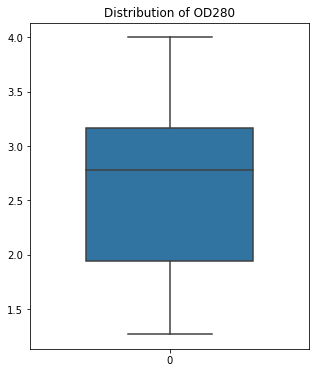

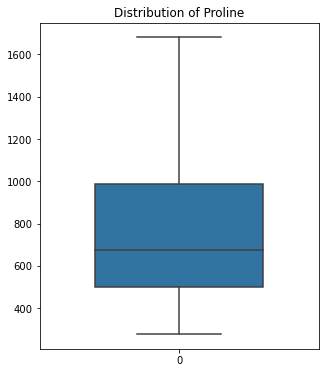

In [12]:

for i in num:
    
    plt.figure(figsize=(5,6))
    sns.boxplot(data=df[i],width=.6)
    plt.title(f'Distribution of {i}')
    plt.show()

In [13]:
df.shape

(178, 13)

In [14]:
#outliers handling

for i in num:
    print(i)
    Q1=np.percentile(df[i], 25, interpolation='midpoint')
    Q2=np.percentile(df[i], 50, interpolation='midpoint')
    Q3=np.percentile(df[i], 75, interpolation='midpoint')
    print(Q1)
    print(Q2)
    print(Q3)
    IQR=Q3-Q1
    low_lim=Q1-1.5*IQR
    up_lim=Q3+1.5*IQR
    print(IQR)
    print(low_lim)
    print(up_lim)
    d=df[(df[i]<low_lim)|(df[i]>up_lim)]
    index=d.index
    print(index)
    df.drop(index, inplace=True)
    

Alcohol
12.364999999999998
13.05
13.675
1.3100000000000023
10.399999999999995
15.640000000000004
Int64Index([], dtype='int64')
Malic_Acid
1.605
1.8650000000000002
3.065
1.46
-0.585
5.255
Int64Index([123, 137, 173], dtype='int64')
Ash
2.21
2.36
2.5549999999999997
0.34499999999999975
1.6925000000000003
3.0724999999999993
Int64Index([25, 59, 121], dtype='int64')
Ash_Alcanity
17.15
19.25
21.5
4.350000000000001
10.624999999999996
28.025000000000002
Int64Index([73, 127], dtype='int64')
Magnesium
88.0
98.0
107.0
19.0
59.5
135.5
Int64Index([69, 78, 95], dtype='int64')
Total_Phenols
1.71
2.36
2.8
1.0899999999999999
0.07500000000000018
4.435
Int64Index([], dtype='int64')
Flavanoids
1.21
2.13
2.8899999999999997
1.6799999999999997
-1.3099999999999996
5.409999999999999
Int64Index([], dtype='int64')
Nonflavanoid_Phenols
0.265
0.34
0.43
0.16499999999999998
0.017500000000000043
0.6775
Int64Index([], dtype='int64')
Proanthocyanins
1.25
1.54
1.9249999999999998
0.6749999999999998
0.23750000000000027
2.93

In [ ]:
df.shape

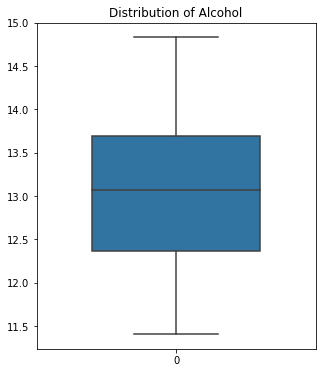

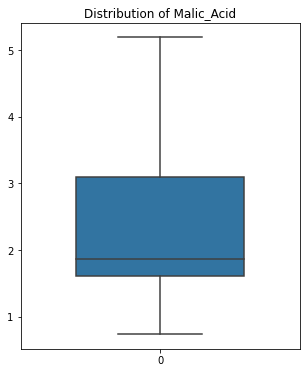

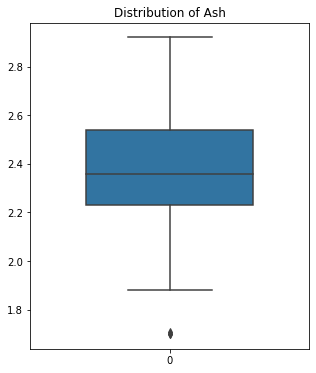

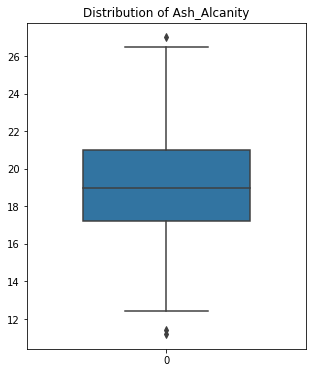

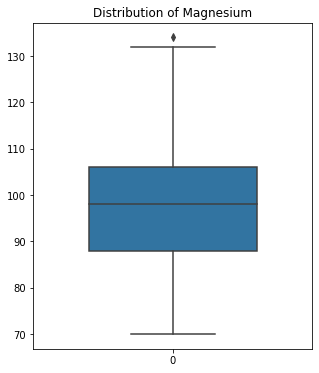

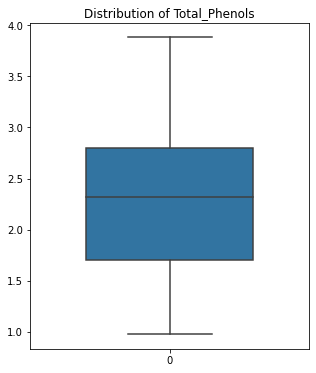

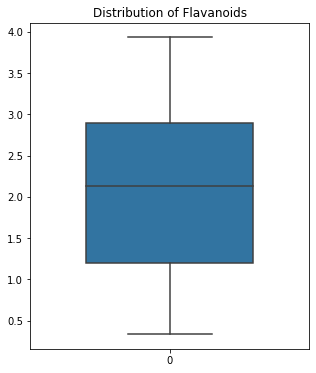

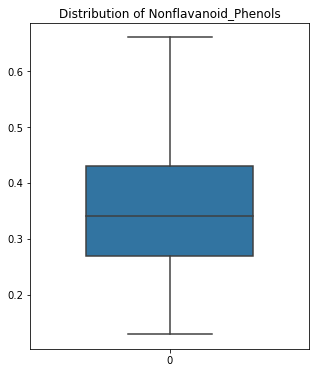

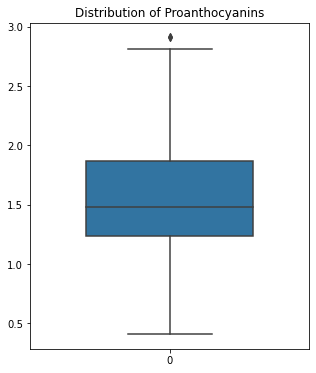

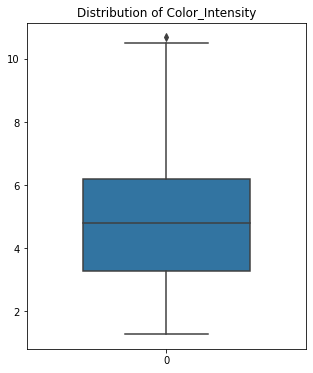

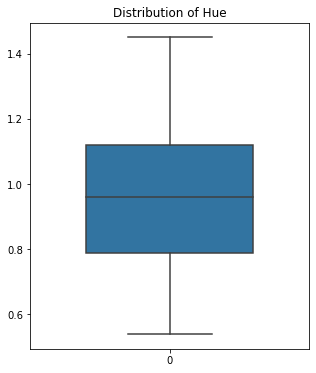

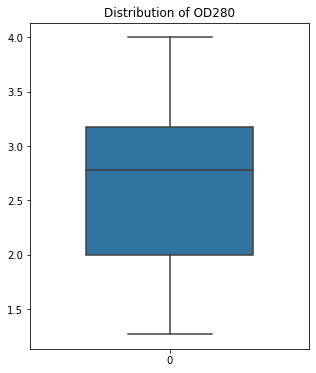

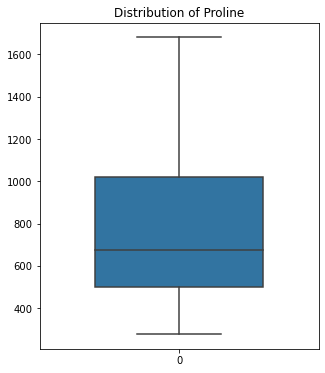

In [15]:

for i in num:
    plt.figure(figsize = (5, 6))
    sns.boxplot(data = df[i], width=.6)
    plt.title(f'Distribution of {i}')
    plt.show()

- Removed the outliers using IQR method

## Data Preprocessing

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(df)

## 2. Try out different clustering models in the wine dataset.
## 3. Find the optimum number of clusters in each model and create the model with the optimum number of clusters.

# K-Means

In [17]:
pd.DataFrame(X)

0         1         2         3         4         5         6   \
0    1.515163 -0.579166  0.270936 -1.248144  2.298023  0.828643  1.055948   
1    0.209648 -0.512507 -0.931537 -2.732175  0.114047  0.589411  0.749315   
2    0.158948  0.039806  1.266087 -0.236305  0.194935  0.828643  1.239928   
3    1.692612 -0.350622  0.561189 -0.843409  1.165591  2.503264  1.495455   
4    0.260347  0.258826  2.095379  0.573166  1.570031  0.828643  0.677767   
..        ...       ...       ...       ...       ...       ...       ...   
156  1.426439  0.182645  0.478259  0.235886 -0.613945 -0.957620 -1.356232   
157  0.463146  1.515815  0.478259  1.247725  0.275823 -0.766235 -1.305127   
158  0.298372  1.868152 -0.433962  0.235886  1.731807 -1.101159 -1.366453   
159  0.171623  0.258826  0.022149  0.235886  1.731807 -1.005466 -1.376675   
160  1.388414  1.696745  1.556339  1.753645 -0.209505 -0.367515 -1.294906   

           7         8         9         10        11        12  
0   -0.650569  1.466583  0.282097  0.383333  1.828097  0.982174  
1   -0.815257 -0.505150 -0.304357  0.429479  1.096928  0.934830  
2   -0.485881  2.481732  0.300715  0.337186  0.773526  1.360929  
3   -0.979945  1.251840  1.287448 -0.447308  1.167233  2.292034  
4    0.255215  0.549044 -0.332284  0.383333  0.436064 -0.059401  
..        ...       ...       ...       ...       ...       ...  
156  0.666936 -0.583238  2.171785 -1.554828 -1.279371 -0.296123  
157  0.584592 -0.251362  1.054728 -1.185655 -1.490285 -0.012057  
158  0.584592 -0.368495  2.404505 -1.693268 -1.490285  0.256228  
159  1.408032 -0.153752  1.985609 -1.647122 -1.405919  0.272009  
160  1.655064 -0.368495  1.939065 -1.600975 -1.434041 -0.611752  

[161 rows x 13 columns]

2092.999999999999
1453.2302460891567
1080.418730392
996.5887935875472
935.3954327556504
883.0645994879957
839.4649448024403
797.7459081496822
769.7408010681215
742.8458390047075


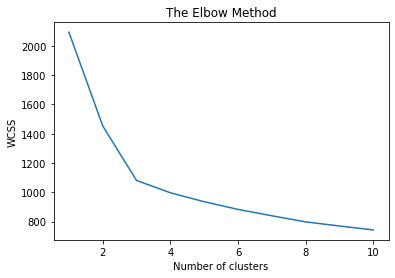

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)
   
    
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

- 3 is the optimum number of clusters

In [19]:
#kmeans
kmeans=KMeans(n_clusters=3,init='k-means++',random_state = 42)
y_kmeans=kmeans.fit_predict(X)
type(X)
y_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

In [20]:
df['KMean_y']= pd.Series(y_kmeans)
df.head()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  KMean_y  
0   3.92     1065      2.0  
1   3.40     1050      2.0  
2   3.17     1185      2.0  
3   3.45     1480      2.0  
4   2.93      735      2.0

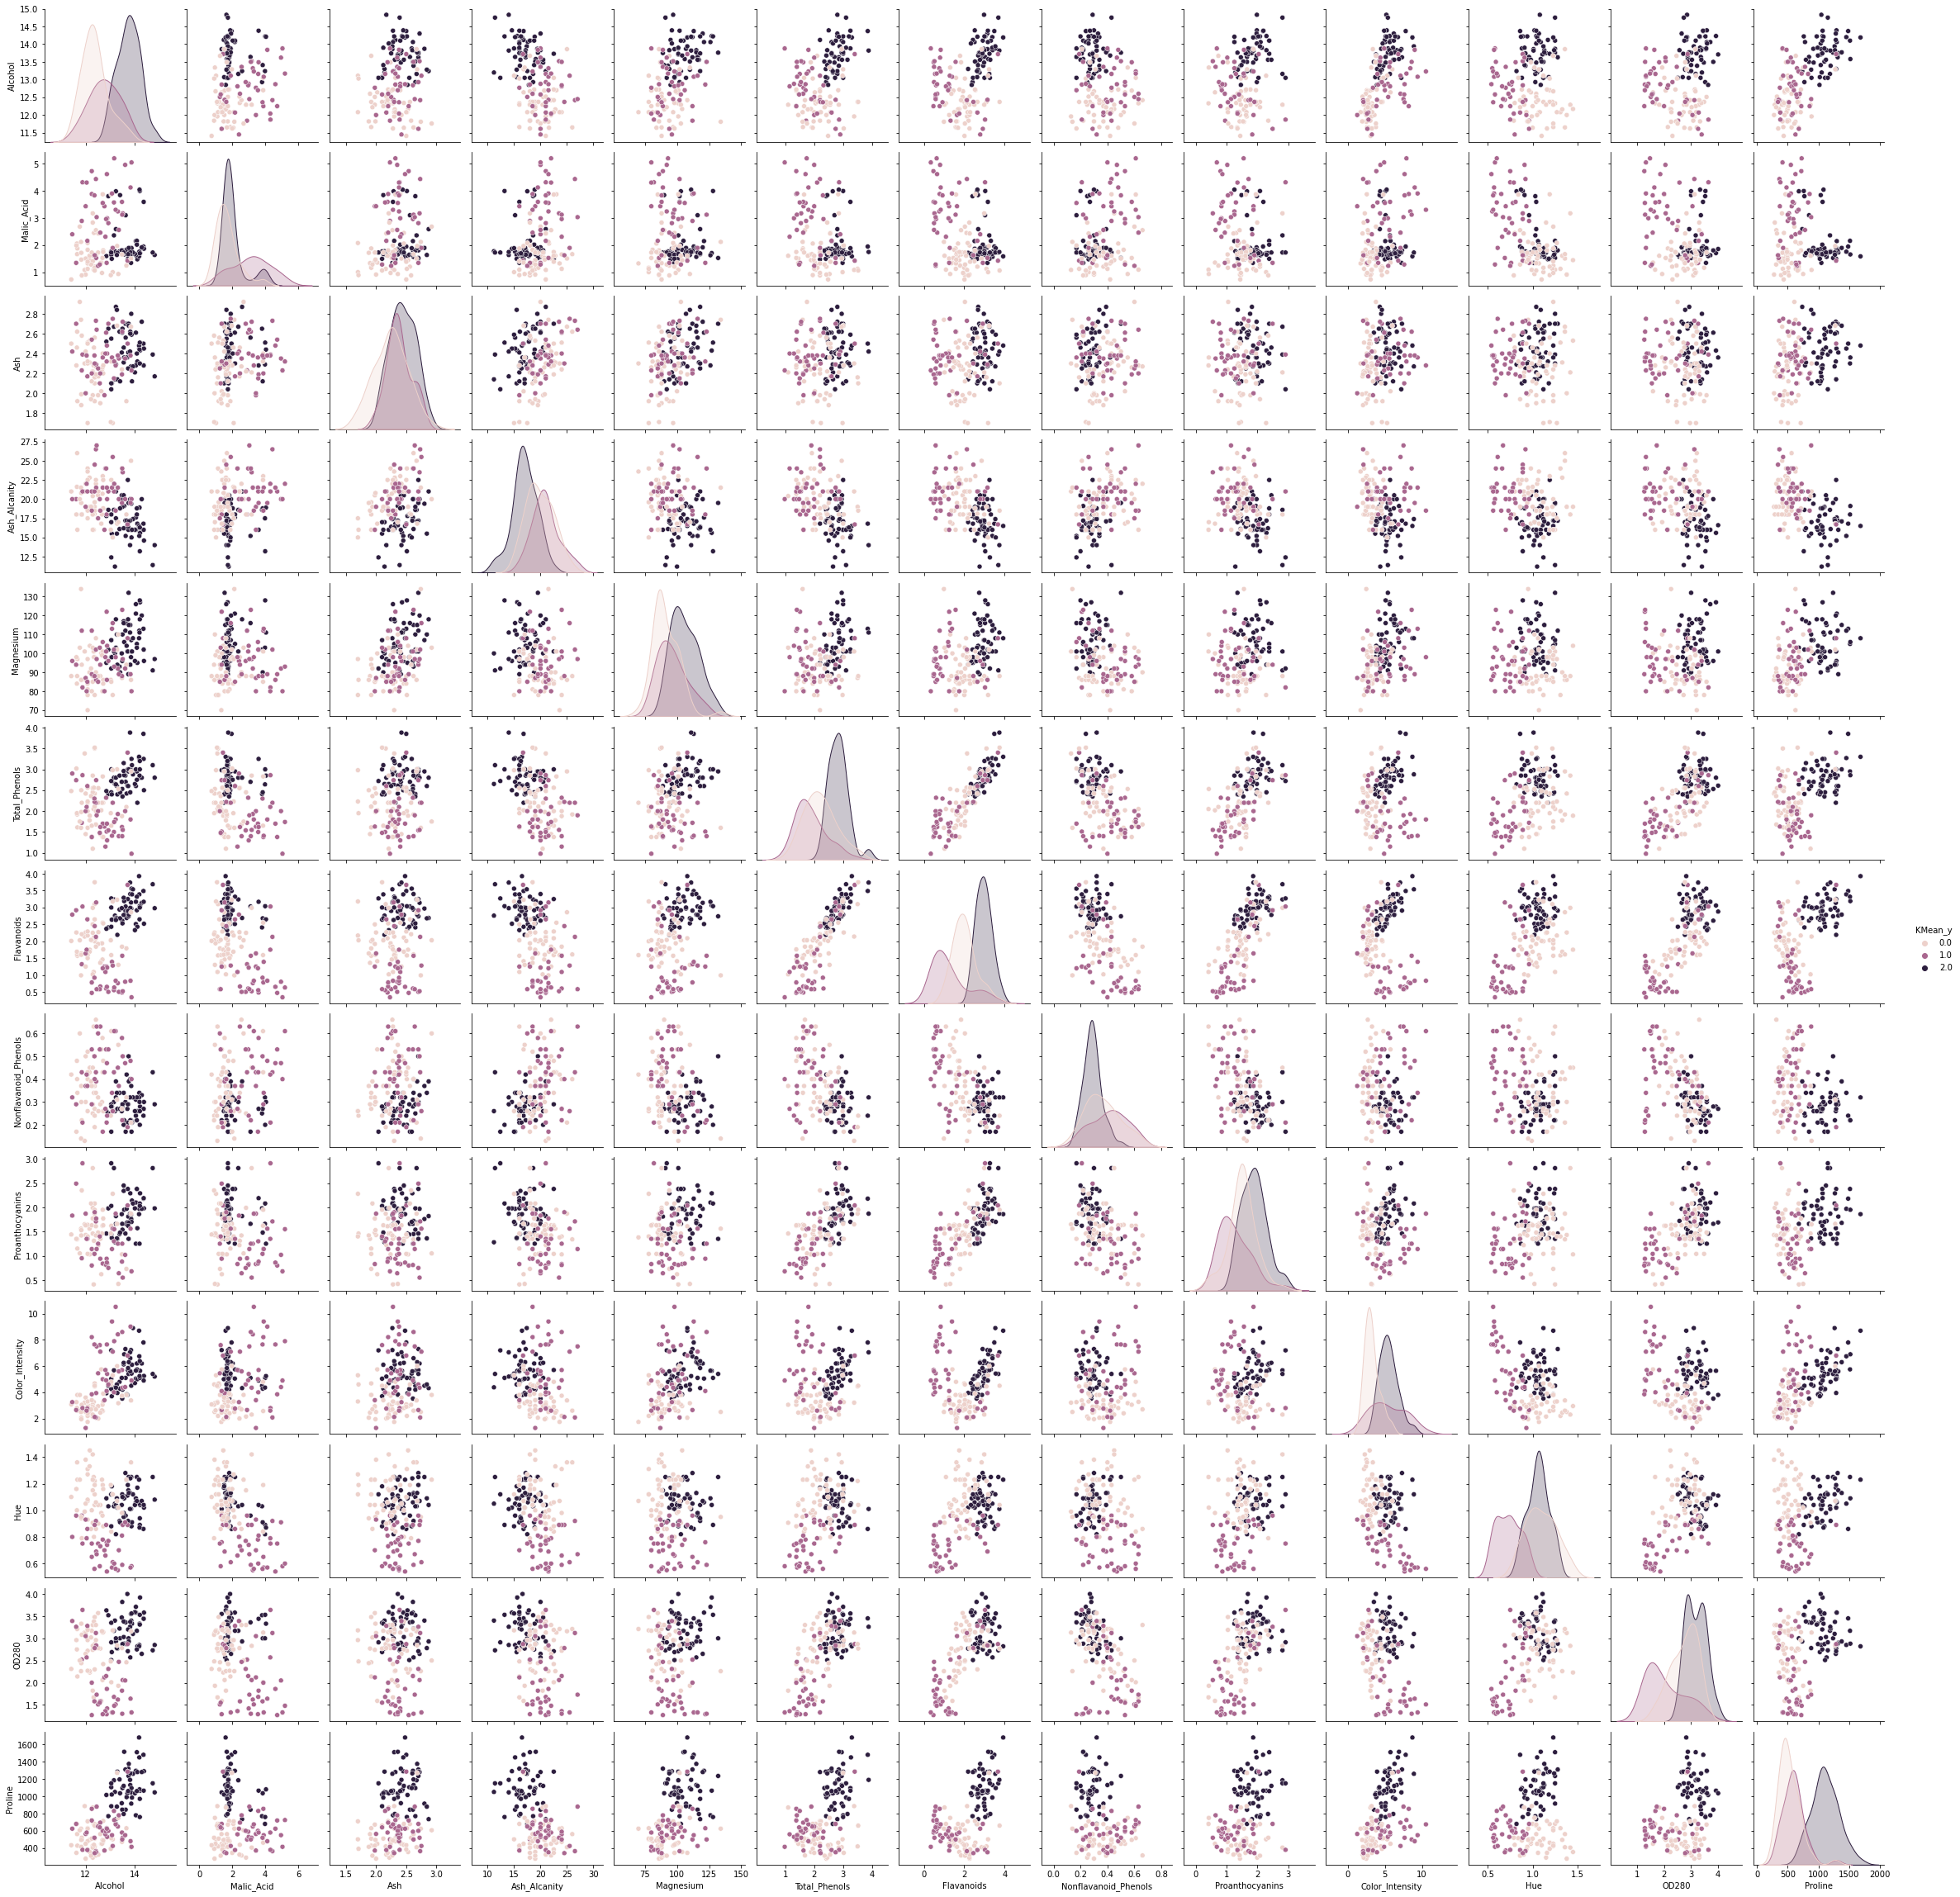

In [21]:
sns.pairplot(df,hue='KMean_y')

## hierarchical clustering


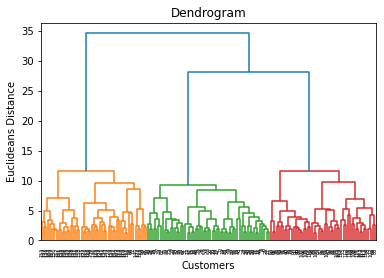

In [22]:
import scipy.cluster.hierarchy as  sch
dendrogram=sch.dendrogram(sch.linkage(X,method='ward'))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclideans Distance')
plt.show()

In [23]:
from sklearn.cluster import AgglomerativeClustering
hc =AgglomerativeClustering(n_clusters=3,affinity = 'euclidean',linkage='ward')
y_hc=hc.fit_predict(X)

In [24]:
y_hc

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 0, 0, 2, 0, 0, 1,
       1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [25]:
df['y_hc']= pd.Series(y_hc)
df.head()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  KMean_y  y_hc  
0   3.92     1065      2.0   2.0  
1   3.40     1050      2.0   2.0  
2   3.17     1185      2.0   2.0  
3   3.45     1480      2.0   2.0  
4   2.93      735      2.0   2.0

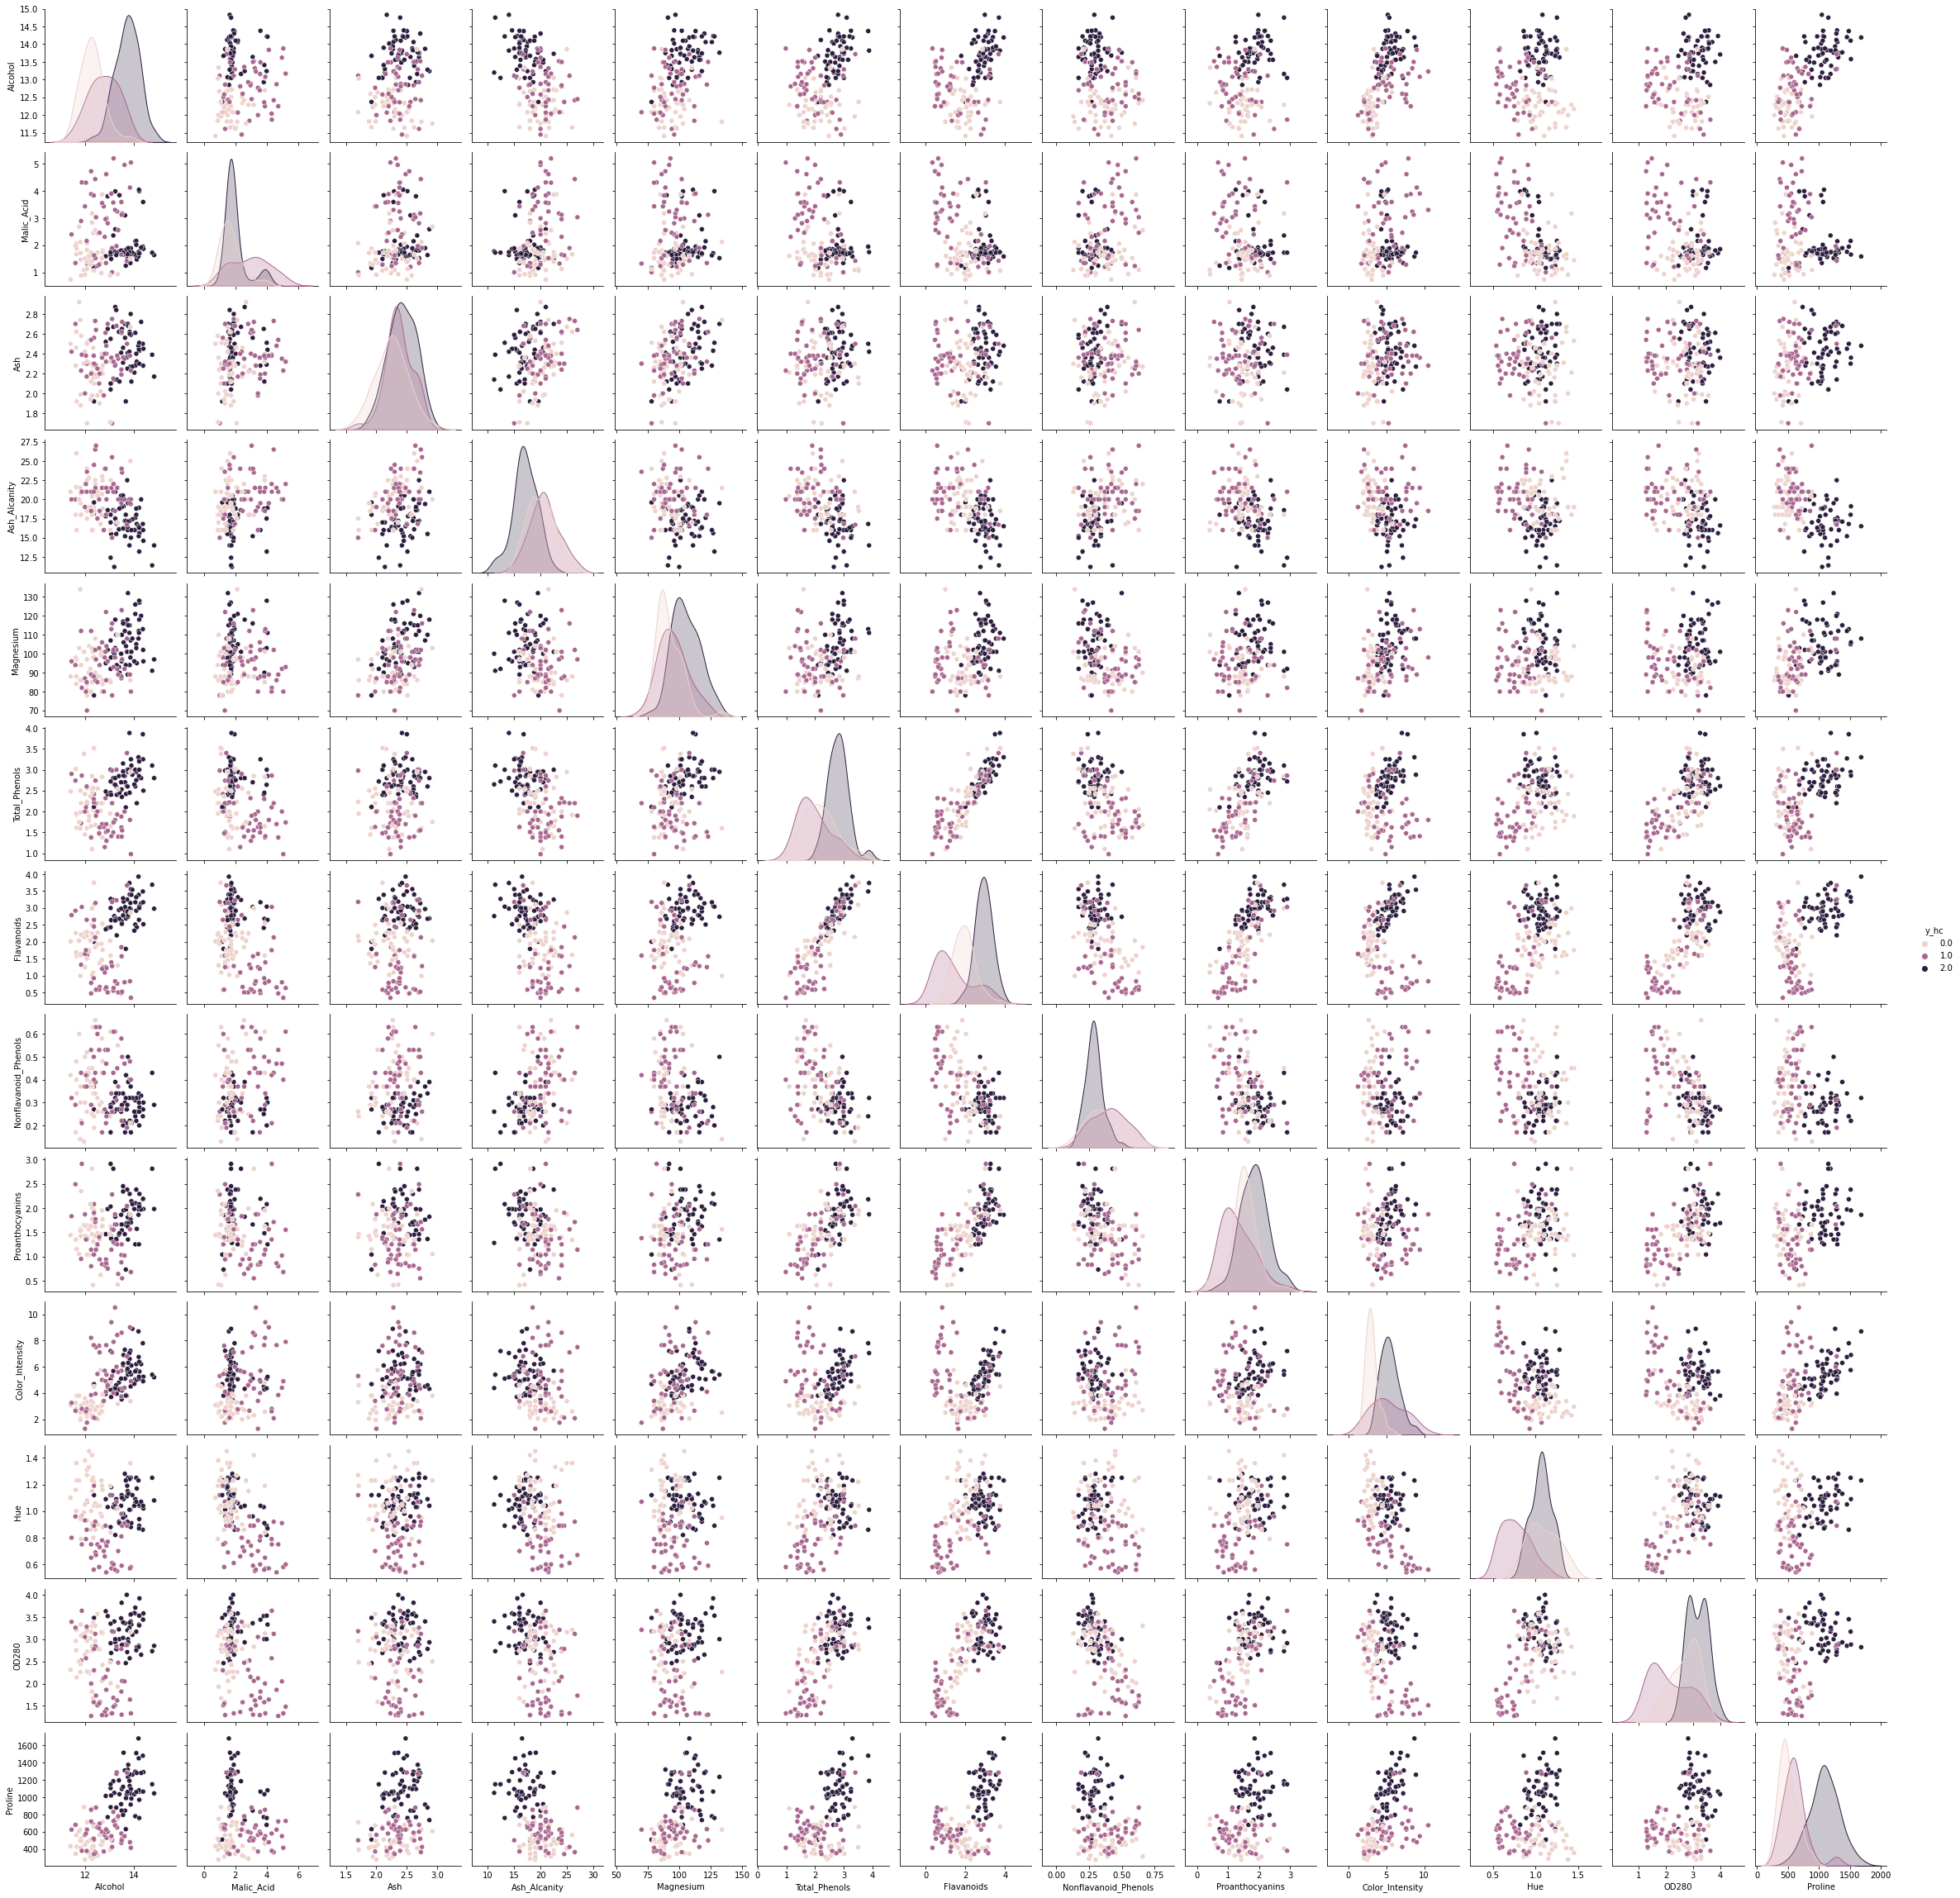

In [27]:
sns.pairplot(df.drop(df[['KMean_y']], axis=1),hue='y_hc')

- 3 is the optimal number of clusters in both K-Means and Agglomerative Hierachical Clustering